In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('master.csv')

In [3]:
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
7872,Ecuador,1999,female,5-14 years,18,1396226,1.29,Ecuador1999,NaN,"19,645,272,636",1805,Millenials
1979,Austria,2001,male,55-74 years,309,735296,42.02,Austria2001,NaN,"197,337,879,195",25848,Silent
26656,United Kingdom,2000,male,25-34 years,768,4536556,16.93,United Kingdom2000,0.865,"1,647,951,278,560",29358,Generation X
20773,Romania,2003,male,25-34 years,349,1803090,19.36,Romania2003,NaN,"59,867,801,205",2898,Generation X
5974,Colombia,2013,male,55-74 years,260,2672132,9.73,Colombia2013,0.718,"380,191,881,860",8731,Boomers


In [4]:
df.shape

(27820, 12)

# Handeling the null values 

In [5]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [6]:
mean_of_HDI = 0.776601
df.fillna(mean_of_HDI, inplace = True)

# Basic info about the columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        27820 non-null  float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.051192,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.776601,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.776601,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.776601,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


# Total number of suicides

In [9]:
df['suicides_no'].sum()

6748420

# Top 10 Countries with the max suicides

In [10]:
list_of_suicides = df.groupby('country')['suicides_no'].sum().sort_values(ascending = False).to_frame().reset_index().head(10)

In [11]:
list_of_suicides

,country,suicides_no
0,Russian Federation,1209742
1,United States,1034013
2,Japan,806902
3,France,329127
4,Ukraine,319950
5,Germany,291262
6,Republic of Korea,261730
7,Brazil,226613
8,Poland,139098
9,United Kingdom,136805


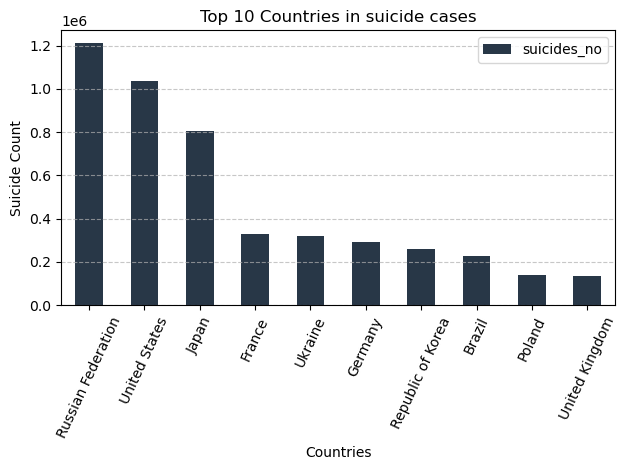

In [12]:
list_of_suicides.plot(kind ='bar', x = 'country', color = '#283747')
plt.title('Top 10 Countries in suicide cases')
plt.xlabel('Countries')
plt.ylabel('Suicide Count')
plt.grid(axis = 'y', linestyle='--', alpha=0.7)
plt.xticks(rotation = 65)
plt.tight_layout()

# Suicide number as per the year 

<AxesSubplot:xlabel='suicides_no', ylabel='year'>

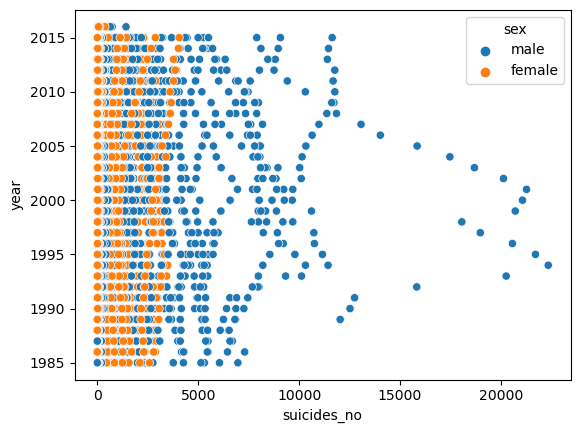

In [13]:
sns.scatterplot(data = df, x = 'suicides_no', y = 'year', hue = 'sex')

# Percentage comparison b/w deaths of males and females

([<matplotlib.patches.Wedge at 0x17b3e019bb0>,
 [Text(-1.0995729091981092, -0.030649916110922895, 'female'),
  Text(1.0995729106329342, 0.030649864636200418, 'male')],
 [Text(-0.5997670413807868, -0.016718136060503395, '23.1%'),
  Text(0.5997670421634186, 0.016718107983382045, '76.9%')])

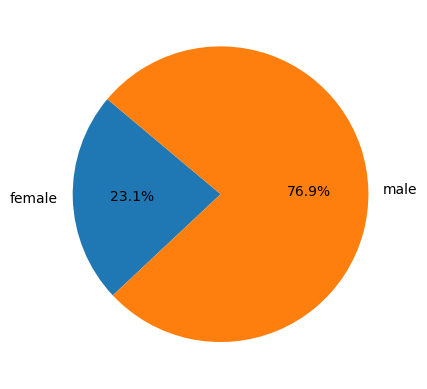

In [14]:
# Find out the total number of suicide cases
df['suicides_no'].sum()
# Group by sex and find out the sum 
death_count_by_sex = df.groupby('sex')['suicides_no'].sum()
# Calculate the mean for this
male_death = death_count_by_sex['male']
female_death = death_count_by_sex['female']
male_death.mean()
female_death.mean()
plt.pie(death_count_by_sex, labels=death_count_by_sex.index, autopct='%1.1f%%', startangle=140)

In [15]:
# sns.distplot(df['age'])

# Count of Age Distribution

In [16]:
Age = df['age'].value_counts()
Age

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

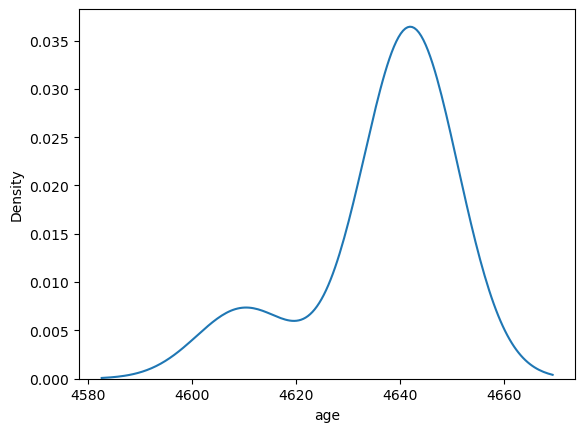

In [17]:
Age_dist = sns.distplot(Age, hist = False)
Age_dist

<AxesSubplot:xlabel='suicides_no', ylabel='Density'>

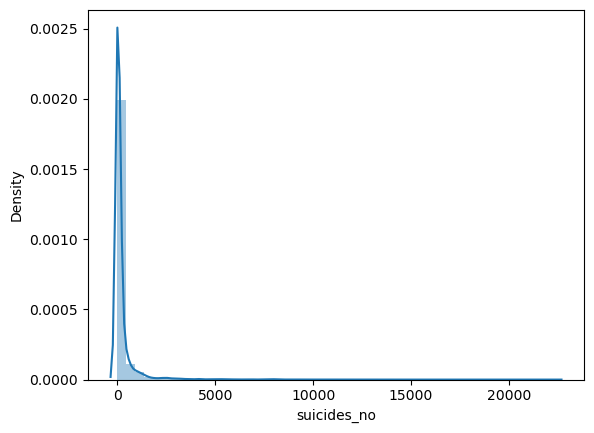

In [18]:
suicide_dist = sns.distplot(df['suicides_no'])
suicide_dist

# Generation Wise Suicide Analysis

In [19]:
df['generation'].value_counts().to_frame()

,generation
Generation X,6408
Silent,6364
Millenials,5844
Boomers,4990
G.I. Generation,2744
Generation Z,1470


In [20]:
generation_wise_suicide_counts = df.groupby('generation')['suicides_no'].sum().sort_values(ascending = False)

In [21]:
generation_wise_suicide_counts.to_frame().reset_index()

,generation,suicides_no
0,Boomers,2284498
1,Silent,1781744
2,Generation X,1532804
3,Millenials,623459
4,G.I. Generation,510009
5,Generation Z,15906


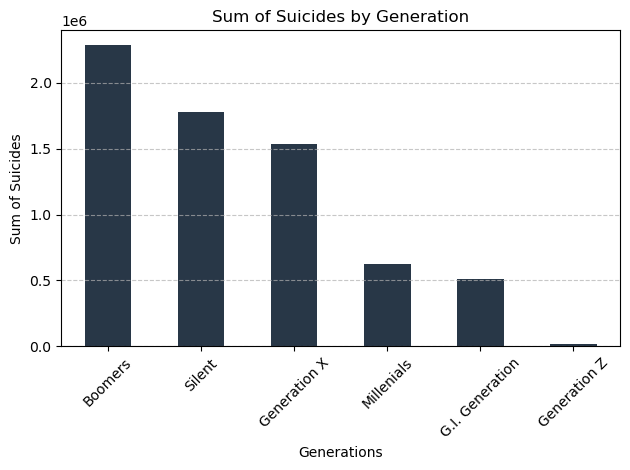

In [22]:
generation_wise_suicide_counts.plot(kind = 'bar', color = '#283747')
plt.title('Sum of Suicides by Generation')
plt.xlabel('Generations')
plt.ylabel('Sum of Suicides')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Seeing the plot above, we can understand the maximum number of suicides were recorded for the "Boomers" Generation

### -The generation known as "Boomers" typically refers to the Baby Boomers generation. Baby Boomers are individuals born roughly between the mid-1940s and mid-1960s, following the end of World War II. 

### -They are called "Boomers" because there was a significant increase in birth rates during this period, leading to a "baby boom."

# Age distribution among suicides for Boomer Generation

In [23]:
ages_in_boomers = df.groupby('generation')['age'].value_counts()['Boomers']

In [24]:
ages_in_boomers.to_frame()

,age
age,
35-54 years,3030
25-34 years,1154
55-74 years,806


In [25]:
boomers_data = df[df['generation'] == 'Boomers']

In [26]:
suicides_by_age_range = boomers_data.groupby('age')['suicides_no'].sum()

# Count of suicides per age range

In [27]:
suicides_by_age_range.sort_values(ascending = False).to_frame().reset_index()

,age,suicides_no
0,35-54 years,1689019
1,25-34 years,304163
2,55-74 years,291316


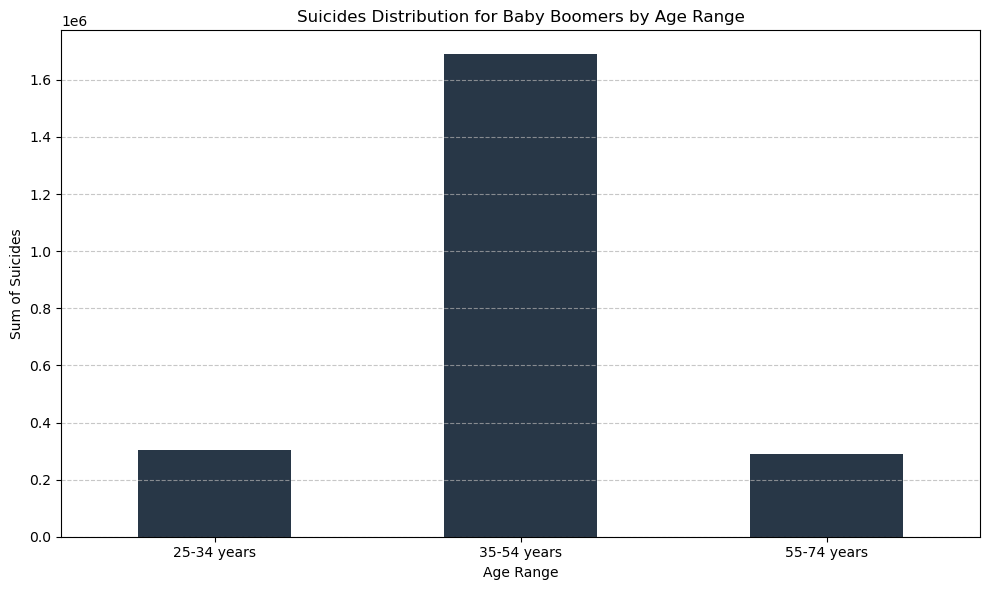

In [28]:
plt.figure(figsize=(10, 6))
suicides_by_age_range.plot(kind='bar', color='#283747')
plt.title('Suicides Distribution for Baby Boomers by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Sum of Suicides')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()